### Name :- Shraddha Pandit Pawar
### Batch no :- ML-18
### Que 1
### Dataset :- Housing


#### Importing libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('housing.csv.csv')

### Pre-processing

#### Introductory Details About Data

In [5]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [6]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000
488,6.030,7.88,21.0,249900


In [9]:
df.shape

(489, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


In [12]:
print(df.columns)

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')


##### Statistical Insights

In [13]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


##### Data cleaning- Checking for null values

In [14]:
df.isna().sum           #gives the number of missing values for each variable

<bound method NDFrame._add_numeric_operations.<locals>.sum of         RM  LSTAT  PTRATIO   MEDV
0    False  False    False  False
1    False  False    False  False
2    False  False    False  False
3    False  False    False  False
4    False  False    False  False
..     ...    ...      ...    ...
484  False  False    False  False
485  False  False    False  False
486  False  False    False  False
487  False  False    False  False
488  False  False    False  False

[489 rows x 4 columns]>

##### Removing Null Entries

In [15]:
df.dropna(axis=0,inplace=True)  #  If null entries are there

In [16]:
df.shape

(489, 4)

In [17]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

#### There is no null value in given Dataset


### Handling Outliers

<AxesSubplot:>

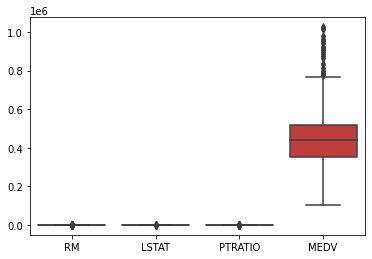

In [18]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='MEDV'>

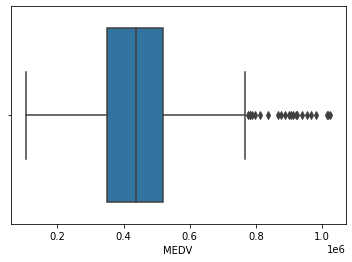

In [19]:
sns.boxplot(x='MEDV' , data=df)

### Removing Outliers

Old Shape:  (467, 4)
New Shape:  (461, 4)


<AxesSubplot:xlabel='MEDV'>

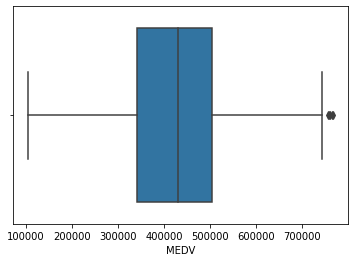

In [24]:
# IQR
Q1 = np.percentile(df['MEDV'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['MEDV'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1


print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['MEDV'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(df['MEDV'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='MEDV', data=df)


#### Data Visualization

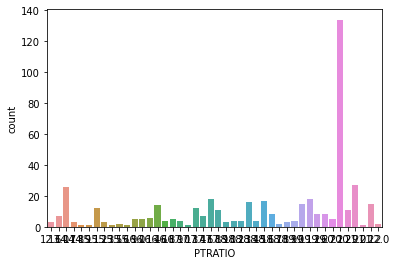

In [26]:
sns.countplot(x='PTRATIO', data=df, )
plt.show()

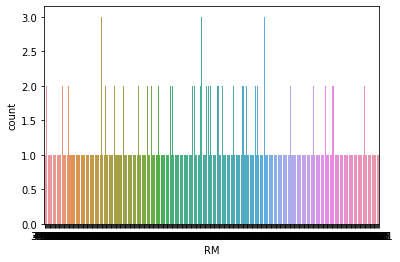

In [27]:
sns.countplot(x='RM', data=df, )
plt.show()

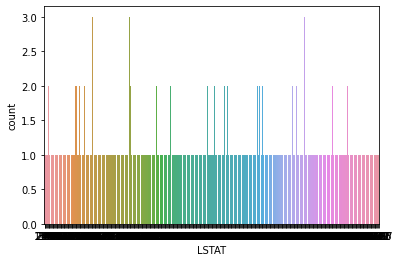

In [28]:
sns.countplot(x='LSTAT', data=df, )
plt.show()

### Relation between variables

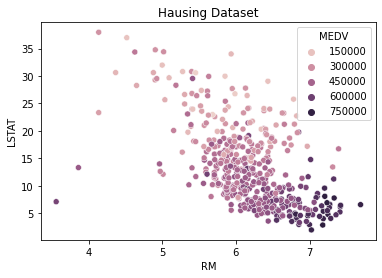

In [30]:
sns.scatterplot(x='RM', y='LSTAT',
                hue='MEDV', data=df, )
plt.title('Hausing Dataset')
plt.show()

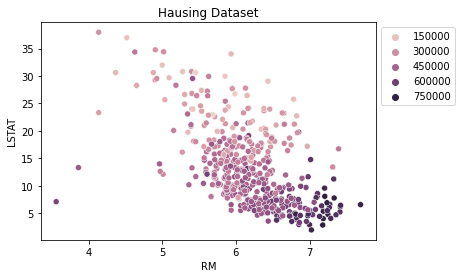

In [31]:
sns.scatterplot(x='RM', y='LSTAT',
                hue='MEDV', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Hausing Dataset')
plt.show()

#### Pair Plot - Multivariate Analysis

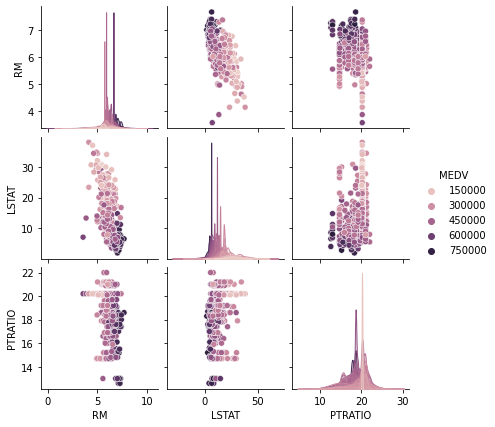

In [32]:
sns.pairplot(df, 
             hue='MEDV', height=2)

In [35]:
from matplotlib import style

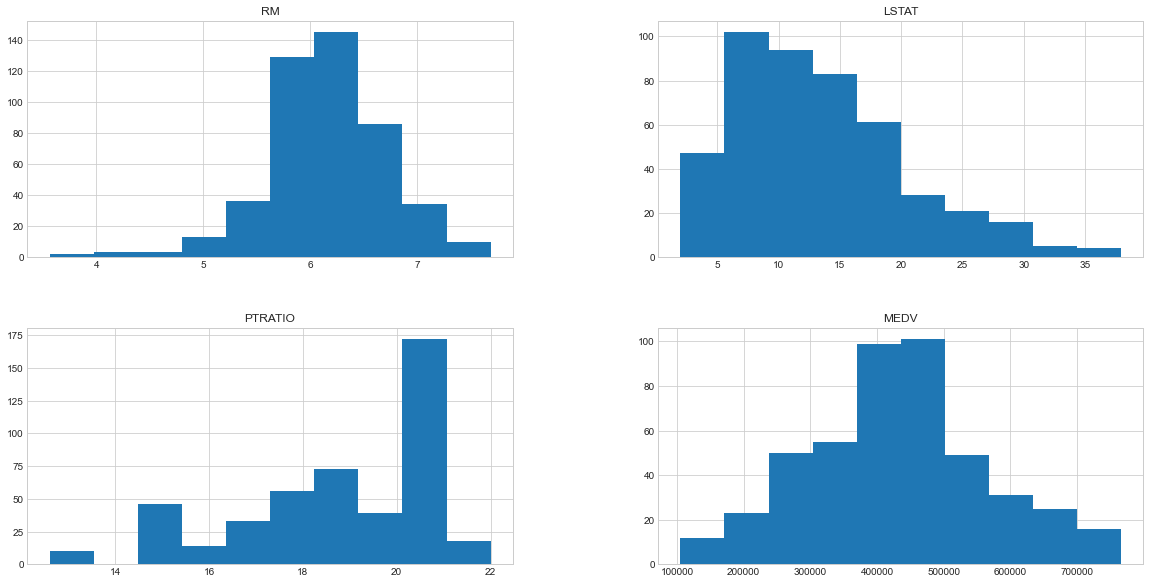

In [38]:
style.use('seaborn-whitegrid')
df.hist(figsize=(20,10))

plt.show()

In [39]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.577810,-0.238330,0.579913
LSTAT,-0.577810,1.000000,0.324233,-0.776898
PTRATIO,-0.238330,0.324233,1.000000,-0.489458
MEDV,0.579913,-0.776898,-0.489458,1.000000


### Handling Correlation

In [41]:
corr=df.corr()
corr

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.577810,-0.238330,0.579913
LSTAT,-0.577810,1.000000,0.324233,-0.776898
PTRATIO,-0.238330,0.324233,1.000000,-0.489458
MEDV,0.579913,-0.776898,-0.489458,1.000000


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<AxesSubplot:>

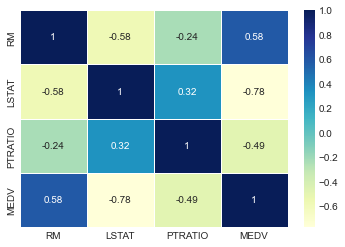

In [45]:
sns.heatmap(corr,annot=True,linewidths=.5,cmap="YlGnBu")

In [61]:
from scipy.stats import pearsonr
stat, p = pearsonr(df['MEDV'],df['RM'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


stat=0.580, p=0.580
Probably dependent


In [62]:
from scipy.stats import pearsonr
stat, p = pearsonr(df['MEDV'],df['LSTAT'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.777, p=-0.777
Probably dependent


In [63]:
from scipy.stats import pearsonr
stat, p = pearsonr(df['MEDV'],df['PTRATIO'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.489, p=-0.489
Probably dependent


In [47]:
from scipy.stats import shapiro
stat, p = shapiro(df)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('probably Gaussian')
else:
    print('probably not Gaussian')
        


stat=0.593, p=0.593
probably not Gaussian


In [60]:
from scipy.stats import anderson
result = anderson(df['MEDV'])
print('stat={0:.3g}'.format(result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('probability Gaussion at % if %% level'%(sl))
    else:
        print('probability not Gaussion at % if %% level'%(sl))
            

stat=1.57
probability not Gaussion at  15f % level
probability not Gaussion at  10f % level
probability not Gaussion at  5f % level
probability not Gaussion at  2f % level
probability not Gaussion at  1f % level


### Conclusion